In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import pickle
import numpy as np
from scipy import sparse
from functools import partial
from sklearn.externals import joblib
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from midi_ml.models.n_tuple import NTupleClassifier

In [24]:
labels = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_labels.pkl")
features = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_matrix.pkl")
features = features.todense()
mozart_labels = [k for k in range(len(labels)) if labels[k] == "mozart"]
bach_labels = [k for k in range(len(labels)) if labels[k] == "bach-js"]
schubert_labels = [k for k in range(len(labels)) if labels[k] == "schubert"]
chopin_labels = [k for k in range(len(labels)) if labels[k] == "chopin"]
tchaikovsky_labels = [k for k in range(len(labels)) if labels[k] == "tchaikovsky"]
X = features[mozart_labels + bach_labels + schubert_labels + chopin_labels + tchaikovsky_labels].A
y = np.array([0 for i in range(len(mozart_labels))] + [1 for i in range(len(bach_labels))] + 
            [2 for i in range(len(schubert_labels))] + [3 for i in range(len(chopin_labels))] +
            [4 for i in range(len(tchaikovsky_labels))])
y = y.reshape((y.shape[0],))
del features

In [25]:
X.shape

(3776, 16384)

In [6]:
import seaborn as sns
import pandas as pd

In [7]:
plot_df = pd.DataFrame({
    "composer": ["mozart", "bach", "schubert", "chopin", "tchaikovsky"],
    "num_records": [len(mozart_labels), len(bach_labels), len(schubert_labels), len(chopin_labels), len(tchaikovsky_labels)]
})

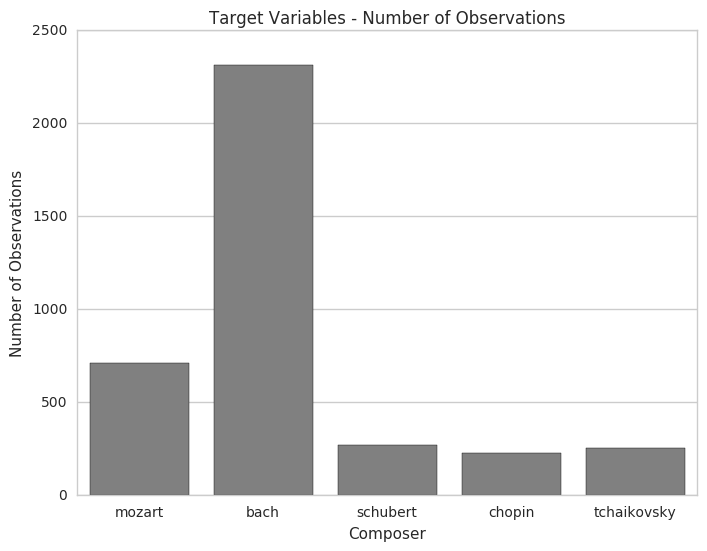

In [9]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.barplot(x="composer", y="num_records",
            data=plot_df,
           color="gray")
plt.xlabel("Composer")
plt.ylabel("Number of Observations")
plt.title("Target Variables - Number of Observations")
plt.show()

In [37]:
composer = ["mozart", "bach", "schubert", "chopin", "tchaikovsky"]
percent_nonzero = []
for i, comp in enumerate(composer):
    percent_nonzero.append(X[y==i].sum(axis=0).astype(bool).mean())
plot_df_2 = pd.DataFrame({
    "composer": composer,
    "percent_nonzero": percent_nonzero
})

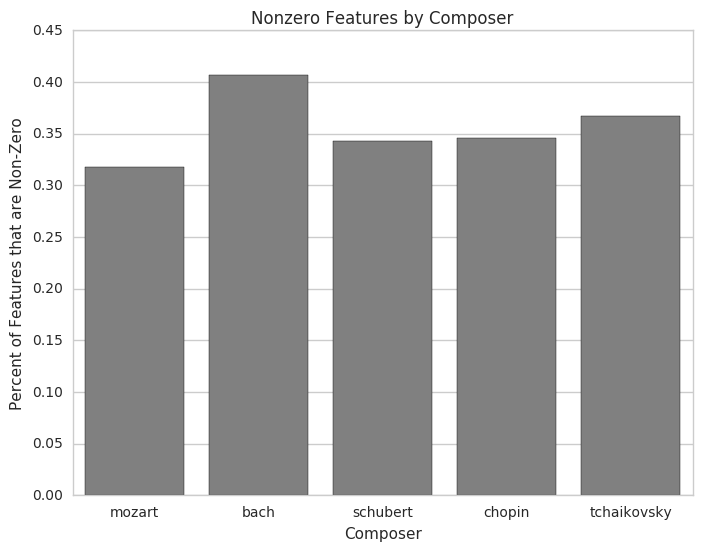

In [39]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.barplot(x="composer", y="percent_nonzero",
            data=plot_df_2,
           color="gray")
plt.xlabel("Composer")
plt.ylabel("Percent of Features that are Non-Zero")
plt.title("Nonzero Features by Composer")
plt.show()

In [43]:
composer = ["mozart", "bach", "schubert", "chopin", "tchaikovsky"]
count_nonzero = []
for i, comp in enumerate(composer):
    count_nonzero.append(X[y==i].sum(axis=0).astype(bool).sum())
plot_df_3 = pd.DataFrame({
    "composer": composer,
    "count_nonzero": count_nonzero
})

In [44]:
plot_df_3

,composer,count_nonzero
0,mozart,5206
1,bach,6667
2,schubert,5612
3,chopin,5673
4,tchaikovsky,6012


In [45]:
X.sum(axis=0).astype(bool).sum()

7616

In [21]:
X = X[:,X.sum(axis=0).nonzero()[0]]

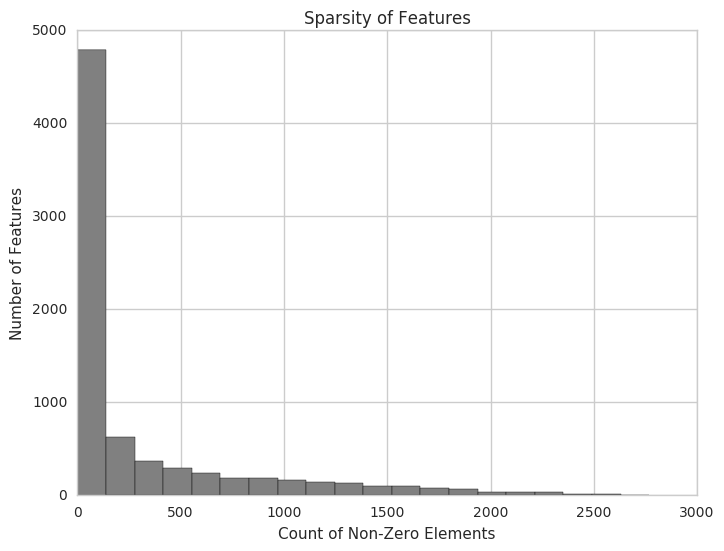

In [22]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.hist(X.astype(bool).sum(axis=0), color="gray", bins=20)
plt.ylabel("Number of Features")
plt.xlabel("Count of Non-Zero Elements")
plt.title("Sparsity of Features")
plt.show()

In [47]:
from midi_ml.models.decomposition import PrincipalComponents

In [48]:
pc = PrincipalComponents(X)

In [ ]:
pc.fit()

In [60]:
np.where(cumulative_var_explained > 0.95)[0][0]

681

/opt/conda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


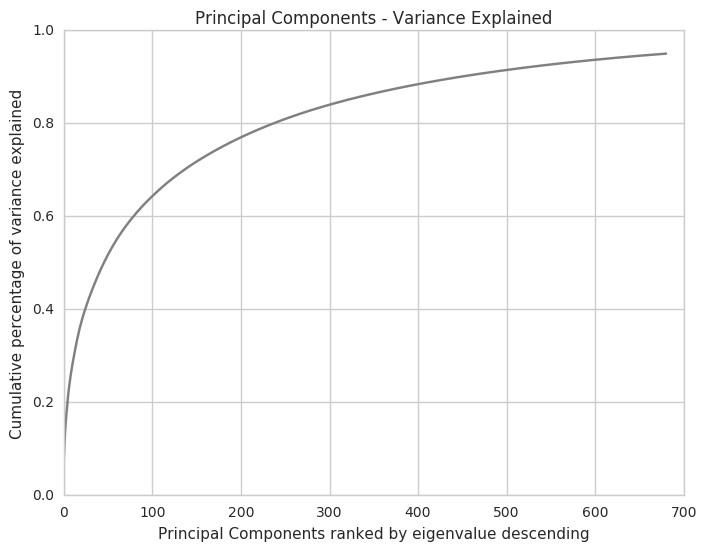

In [61]:
cumulative_var_explained = pc.eigenvalues_.cumsum() / pc.eigenvalues_.sum()
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.plot(cumulative_var_explained[:np.where(cumulative_var_explained > 0.95)[0][0]], color="gray")
plt.ylim(0,1)
plt.ylabel("Cumulative percentage of variance explained")
plt.xlabel("Principal Components ranked by eigenvalue descending")
plt.title("Principal Components - Variance Explained")
plt.show()
plt.show()